In [2]:
import torch, platform, sys
print("Python:", sys.executable)
print("PyTorch:", torch.__version__)
print("CUDA disponível?", torch.cuda.is_available())
mps_ok = getattr(torch.backends, "mps", None) and torch.backends.mps.is_available()
print("MPS (Apple) disponível?", bool(mps_ok))

Python: /opt/conda/envs/anaconda-ai-2024.04-py310/bin/python
PyTorch: 2.2.0
CUDA disponível? False
MPS (Apple) disponível? False


In [3]:
a = torch.tensor([[0., 2., 4.], [3., 5., 7.]])  # shape (2, 3)
b = torch.zeros(3, 3, 3)  # shape (3, 3, 3)
c = torch.linspace(0, 1, 10)  # shape (x)
d = torch.ones(1, 3)  # shape (1, 3)

In [5]:
a.size()  # dimensions

a[0, 0]  # 0th element
a[:, 0]  # first order tensor along 0th dimension (returns all rows in 0th column)
a[-1, -1]  # last element (7.)
b[0, :, :]  # 0th second order tensor
a[0, 1:3]  # last two elements of the 0th first order tensor (2., 4.)

tensor([2., 4.])

In [4]:
torch.cat((a, d), 0)  # return concatenation in dimension 0. (3, 3)
torch.transpose(a, 0, 1)  # return a with dimensions 0 and 1 transposed (3, 2)
torch.permute(b, (2, 1, 0))  # dimensions 0 and 2 are permuted
torch.reshape(a, (1, 6))  # or c.view(1, 6) reshape to (1, 6)
torch.unsqueeze(a, 0)  # creates an additional empty dimension (1, 2, 3)
torch.squeeze(d, 0)  # removes first empty dimension (3)
torch.flatten(b)  # flattens b (27)
torch.ones_like(c)  # creates a tensor of ones with the shape of c
torch.cos(a)  # applies cosine to each entry

tensor([[ 1.0000, -0.4161, -0.6536],
        [-0.9900,  0.2837,  0.7539]])

In [6]:
import numpy as np

a = np.array([2., 3.])
b = torch.from_numpy(a)  # convert numpy array to torch tensor
c = b.numpy()  # convert to torch tensor from numpy array

a == c

array([ True,  True])

In [8]:
x = torch.linspace(0, 1, 10)  # shape (10)
y = torch.linspace(0, 2, 5)  # shape (5)
x, y = torch.meshgrid(x, y, indexing='ij')  # grid of shape (10, 5)
     

In [9]:

## Member Variables
x.data  # values stored in the tensor
x.requires_grad  # boolean enabling computation graph
x.grad  # value of the gradient
x.grad_fn  # function handle storing previous operation
x.is_leaf  # boolean stating if tensor is a leaf node (see Chapter 2)

True

In [10]:
x = torch.linspace(0., 1., 20, requires_grad=True)
y = 2 * x
z = y ** 2

y.retain_grad()  # otherwise gradient with respect to y will be deleted

z.backward(torch.ones_like(z))  # differentiate z with respect to all variables used to create it

dzdx = x.grad  # gradient of z with respect to x: 8 * x
dzdy = y.grad  # gradient of z with respect to y: 2 * y = 4 * x

print(x.grad)

tensor([0.0000, 0.4211, 0.8421, 1.2632, 1.6842, 2.1053, 2.5263, 2.9474, 3.3684,
        3.7895, 4.2105, 4.6316, 5.0526, 5.4737, 5.8947, 6.3158, 6.7368, 7.1579,
        7.5789, 8.0000])


Matplotlib is building the font cache; this may take a moment.


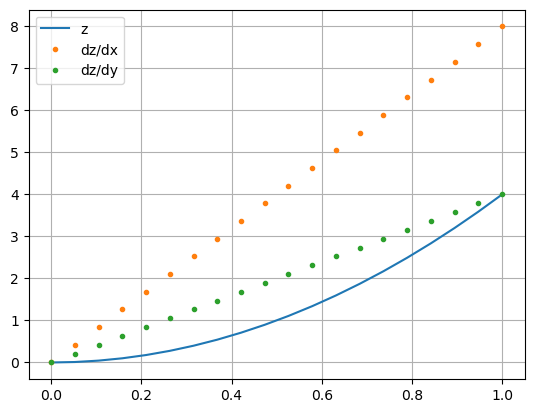

In [11]:
import matplotlib.pyplot as plt

# Plot the function and gradients with respect to variables used in its graph
# .detach() is used when the computation graph is no longer needed
plt.plot(x.detach(), z.detach(), label='z')
plt.plot(x.detach(), dzdx, '.', label='dz/dx')
plt.plot(x.detach(), dzdy, '.', label='dz/dy')

plt.legend()
plt.grid(True)
plt.show()

In [12]:
model = torch.nn.Linear(2, 3)  # input size: 2 and output size: 3
x = torch.tensor([[1., 2.]])  # input
y = model(x)  # output

# access weight parameters
model.weight.data  # returns a tensor of shape (3, 2)
model.bias.data  # returns a tensor of shape (3)

tensor([ 0.5453, -0.2995, -0.5264])

In [13]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

a = torch.ones(4, device=device)  # cuda
b = torch.ones(4)  # cpu

# transfer to CUDA
b = b.to(device)
model = model.to(device)

# transfer back to CPU
a.cpu()

tensor([1., 1., 1., 1.])